In [1]:
#import
#numpy, panda, scipy, mth, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [3]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [4]:
#cross validation
from sklearn.model_selection import train_test_split

In [5]:
#data
rawDatajj = pd.read_csv('creditjjp.csv', header=0)
rawDatajj.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
rawDatajj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
Unnamed: 0                    30000 non-null int64
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5               

In [7]:
#features
features = rawDatajj.iloc[:, [4,7,8,9,10,11,12,25]]
print('Summary of feature sample')
features.head()

Summary of feature sample


,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,2,2,2,-1,-1,-2,-2,1
1,2,-1,2,0,0,0,2,1
2,2,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0
4,2,-1,0,-1,0,0,0,0


In [8]:
#dependent variable
depVar = rawDatajj['default payment next month']

In [9]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,2,2,2,-1,-1,-2,-2,1
1,2,-1,2,0,0,0,2,1
2,2,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0
4,2,-1,0,-1,0,0,0,0


In [10]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [11]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       EDUCATION  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
29900          2      0      0     -2     -2     -2     -2   
29901          2      1      2      0      0      0      0   
29902          3      0     -1      0      0      0      0   
29903          1     -1      0     -1     -1     -1     -1   
29904          3      0      0      0      0      0      0   

       default payment next month  
29900                           1  
29901                           0  
29902                           0  
29903                           0  
29904                           1  


In [12]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [13]:
#cross validation
from sklearn.model_selection import train_test_split

In [14]:
#implement Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [15]:
#shape function
X_train.shape, X_test.shape

((750, 8), (250, 8))

In [16]:
#Cross validate
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 8), (188, 8))

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [18]:
#Models
modelSVR = SVR(C=1.0, cache_size=250, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
print(modelSVR)
modelRF = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
print(modelRF)
modelLR = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)
print(modelLR)

SVR(C=1.0, cache_size=250, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)


In [19]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [20]:
# create the RFE model and select 5 attributes
rfe = RFE(modelRF,5)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False  True  True]
[4 1 1 1 3 2 1 1]


In [21]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=250, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [23]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [24]:
print(cross_val_score(modelRF, X_train, y_train))

C:\Users\JoniJohnson-Powe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.99981356 0.99992297 0.99995936]


In [25]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\JoniJohnson-Powe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.99981356 0.99992297 0.99995936]


0.9999866282114104

In [26]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[0.88555109 0.89302408 0.92823418]


C:\Users\JoniJohnson-Powe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9684907495138042

In [27]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[1. 1. 1.]


C:\Users\JoniJohnson-Powe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


1.0

In [28]:
print(cross_val_score(rfe, X_train, y_train)) 
rfe.score(X_train,y_train)

C:\Users\JoniJohnson-Powe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1. 1. 1.]


1.0

In [31]:
predictions = modelSVR.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
from math import sqrt

In [34]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [35]:
predRsquared = r2_score(y_test,predictions)

In [36]:
#Make Predictions
predictions = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.912
RMSE: 0.116


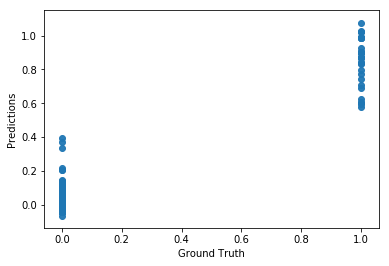

In [37]:
plt.scatter(y_test,predictions, alpha=.95)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();